<a href="https://colab.research.google.com/github/Hamza1122/Deep-Learning-Ass/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><h1>Efficient Training of Convolutional Neural Network </h1></strong>



<h2> What to submit </h2>

<ol>
<li>	Your Python notebook solution source file. </li>
<li>	The output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your task, if any (e.g., images used in your answers).</li>
</ol>
</p>


<h2> Warning </h2>

Some components of this task may involve heavy computation that runs for a long duration. Please start early to avoid missing the due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality  report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the task will be assessed by the overall quality per the above criteria.
</p>
</div>

## Task objective

You will experience training a much deeper network on a large-scale dataset. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks


In previous task, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In this task, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN


Review your previous tasks solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [2]:
# Loading the mnist dataset with Keras
#importing libraries
import numpy as np
import time
import datetime
import keras
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras import models, layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from tensorflow.keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split


tfds.disable_progress_bar()
tf.enable_v2_behavior()


(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']                  


# preprocessing using pipelining
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (28,28))
    image = image / 255.0
    return image, features['label']  


#creating input pipeline
ds_train = ds_train.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)


#ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)   



#creating pipeling for test images
ds_test = ds_test.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
path="logs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1,write_graph=True)


#setting up a model for training
#Now we are adding batch Normalization, Dropout, Regularization and learning Schedule of Optimzer
model1 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
tf.keras.layers.Dropout(.3),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1e-4)),
tf.keras.layers.Dropout(.3),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1e-4)),
tf.keras.layers.Dropout(.3),
tf.keras.layers.BatchNormalization(),

tf.keras.layers.Dense(10, activation='softmax')
])
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
from keras.utils.vis_utils import plot_model
model1.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteL6UMHA/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteL6UMHA/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 128)               100480    


In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

model1.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history=model1.fit(ds_train,epochs=100,validation_data=ds_test,callbacks=[tbCallBack])

Epoch 1/100
      2/Unknown - 0s 97ms/step - loss: 4.1498 - accuracy: 0.1484 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0086s vs `on_train_batch_end` time: 0.1837s). Check your callbacks.


469/469 [==============================] - 3s 7ms/step - loss: 1.2522 - accuracy: 0.6629 - val_loss: 1.3030 - val_accuracy: 0.6621
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1340 - accuracy: 0.6952 - val_loss: 1.0360 - val_accuracy: 0.7419
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1330 - accuracy: 0.6983 - val_loss: 0.7966 - val_accuracy: 0.8121
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1714 - accuracy: 0.6859 - val_loss: 1.4498 - val_accuracy: 0.7493
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1566 - accuracy: 0.6955 - val_loss: 0.8695 - val_accuracy: 0.7649
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1498 - accuracy: 0.6938 - val_loss: 1.0295 - val_accuracy: 0.7157
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1327 - accuracy: 0.6996 - val_loss: 1.2236 - val_accuracy: 0.7398
Epoch 8/100

### Task 1.2 Train a ConvNet from scratch


Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [ ]:
#Now Using CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
from keras.utils.vis_utils import plot_model
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=100,validation_data=ds_test,callbacks=[callback])

Epoch 1/100
      2/Unknown - 0s 38ms/step - loss: 2.2842 - accuracy: 0.1445 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0062s vs `on_train_batch_end` time: 0.0689s). Check your callbacks.


469/469 [==============================] - 3s 6ms/step - loss: 0.5159 - accuracy: 0.8131 - val_loss: 0.3819 - val_accuracy: 0.8650
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3300 - accuracy: 0.8800 - val_loss: 0.3227 - val_accuracy: 0.8828
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2850 - accuracy: 0.8959 - val_loss: 0.3307 - val_accuracy: 0.8794
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2545 - accuracy: 0.9053 - val_loss: 0.2829 - val_accuracy: 0.8962
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2308 - accuracy: 0.9160 - val_loss: 0.2713 - val_accuracy: 0.8993
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2105 - accuracy: 0.9225 - val_loss: 0.2553 - val_accuracy: 0.9072
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1951 - accuracy: 0.9275 - val_loss: 0.2609 - val_accuracy: 0.9064
Epoch 8/100

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


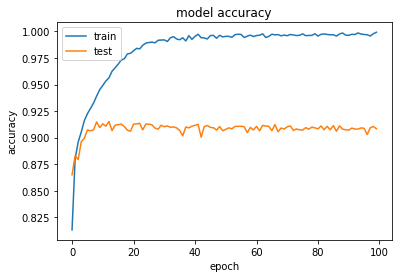

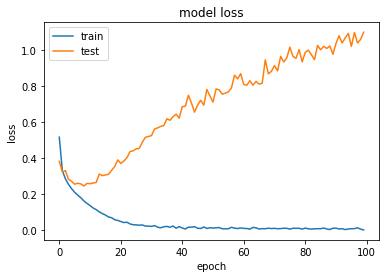

In [ ]:
#Accuracy Report 

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Task 1.3 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [ ]:
#Data Augmentation Input Pipeline 
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


#Now Using CNN
model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,                                
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])




In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=100,validation_data=ds_test,callbacks=[callback])

Epoch 1/100
      2/Unknown - 0s 79ms/step - loss: 2.3022 - accuracy: 0.1562WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0318s vs `on_train_batch_end` time: 0.0856s). Check your callbacks.


469/469 [==============================] - 39s 82ms/step - loss: 1.6205 - accuracy: 0.4153 - val_loss: 1.1305 - val_accuracy: 0.5943
Epoch 2/100
469/469 [==============================] - 39s 82ms/step - loss: 1.1273 - accuracy: 0.5996 - val_loss: 0.9448 - val_accuracy: 0.6644
Epoch 3/100
469/469 [==============================] - 39s 82ms/step - loss: 1.0065 - accuracy: 0.6365 - val_loss: 0.8766 - val_accuracy: 0.6880
Epoch 4/100
469/469 [==============================] - 38s 82ms/step - loss: 0.9451 - accuracy: 0.6575 - val_loss: 0.8302 - val_accuracy: 0.7055
Epoch 5/100
469/469 [==============================] - 38s 82ms/step - loss: 0.9139 - accuracy: 0.6686 - val_loss: 0.8000 - val_accuracy: 0.7111
Epoch 6/100
469/469 [==============================] - 39s 82ms/step - loss: 0.8899 - accuracy: 0.6780 - val_loss: 0.7967 - val_accuracy: 0.7086
Epoch 7/100
469/469 [==============================] - 38s 82ms/step - loss: 0.8635 - accuracy: 0.6873 - val_loss: 0.7634 - val_accuracy: 0.72

### Task 1.4 Fashion-MNIST with transfer learning



Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



Without Fine Tuning

In [ ]:
#Loading the dataset and putting them into 3 channels
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
X_train = np.dstack([trainX] * 3)
X_test = np.dstack([testX]*3)

In [ ]:
#we are reshaping the images
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

# Display the new shape
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
#Normalizing the images
train_X = X_train / 255.
test_X = X_train / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [ ]:
from keras.preprocessing.image import img_to_array, array_to_img

#Converting them into numpy array with image size of 48X48
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((60000, 48, 48, 3), (60000, 48, 48, 3))

In [ ]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [ ]:
#Converting the labels data into one hot encoding 
train_Y_one_hot = to_categorical(trainY)
test_Y_one_hot = to_categorical(testY)

In [ ]:
#Splitting the dataset 
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [ ]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [ ]:
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)
train_X

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [ ]:
#We are using VGG 16 on the behalf og transfer learning as a predefined neural network
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)  #input shapes are being passed
                 )
conv_base.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
# we are extracting the features
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)  
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

   1/3000 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_predict_batch_end` time: 0.0044s). Check your callbacks.


   1/3750 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_predict_batch_end` time: 0.0042s). Check your callbacks.


  1/750 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0014s vs `on_predict_batch_end` time: 0.0041s). Check your callbacks.


750/750 [==============================] - 4s 6ms/step


In [ ]:
#saving the extracted features incase we can use later 
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, testY)
np.savez("val_features", val_features, valid_label)


In [ ]:
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (60000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [ ]:
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [ ]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [ ]:
# Train the Model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=100,
    validation_data=(val_features_flat, valid_label),
  # callbacks=callbacks
)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3029 - val_acc: 0.1007
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - acc: 0.0975 - val_loss: 2.3029 - val_acc: 0.0964
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - acc: 0.0996 - val_loss: 2.3029 - val_acc: 0.0964
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3028 - val_acc: 0.0964
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3029 - val_acc: 0.0964
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - acc: 0.0981 - val_loss: 2.3028 - val_acc: 0.0993
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3029 - val_acc: 0.0964
Epoch 8/100
1500/1500 [==============================] 

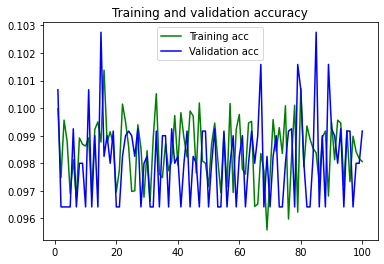

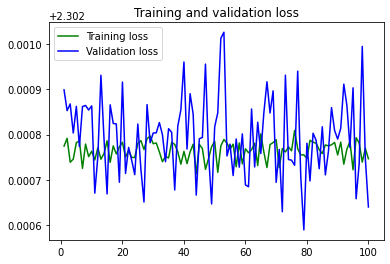

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

With Fine-Tuning

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable =  False


for layer in conv_base.layers:
    print(layer, layer.trainable)


Number of layers in the base model:  19
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f18300ce0f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300ced68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300ceac8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18300ce5f8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300bf828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300f6588> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18300f6da0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300f6e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300dcd68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18300e6748> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18300e6a58> False
<tensorflow.python.kera

In [ ]:
#Same with-tuning features are being extract
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))


   1/3000 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_predict_batch_end` time: 0.0043s). Check your callbacks.


   1/3750 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_predict_batch_end` time: 0.0038s). Check your callbacks.


  1/750 [..............................] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_predict_batch_end` time: 0.0042s). Check your callbacks.


750/750 [==============================] - 4s 6ms/step


In [ ]:
#Now we are trainig model with fine-tune
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model2 = models.Sequential()
model2.add(Flatten())
model2.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model2.add(layers.LeakyReLU(alpha=0.1))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])
 


In [ ]:
#fine_tune_epochs = 10
#total_epochs =  1 + fine_tune_epochs

In [ ]:
history = model2.fit(train_features_flat,
                        train_label,
                         epochs=100,
                       #  initial_epoch=history.epoch[-1],
                         validation_data=(val_features_flat, valid_label),
                         )

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3054 - acc: 0.0986 - val_loss: 2.3056 - val_acc: 0.0983
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3051 - acc: 0.1027 - val_loss: 2.3067 - val_acc: 0.0964
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3055 - acc: 0.0996 - val_loss: 2.3043 - val_acc: 0.0993
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3054 - acc: 0.0995 - val_loss: 2.3054 - val_acc: 0.0964
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3054 - acc: 0.0976 - val_loss: 2.3062 - val_acc: 0.0980
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3054 - acc: 0.0970 - val_loss: 2.3068 - val_acc: 0.0980
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3055 - acc: 0.0987 - val_loss: 2.3063 - val_acc: 0.0964
Epoch 8/100
1500/1500 [==============================] 

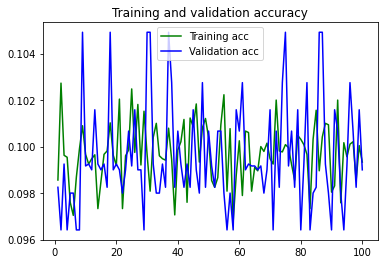

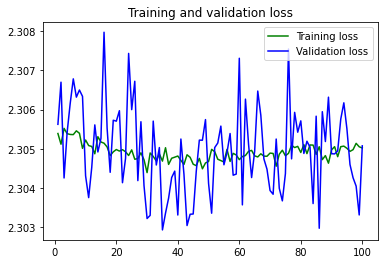

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

Comparing results of both fine-tine and without fine-tine. We conclude that fine-tune model performs well based on the given epochs.

### Task 1.5 Performance comparison


Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?



| Task |Epochs |Test Accuracy
|-------|---------|----------|
|   1.1 (With DenseLayers)  | 100 | 0.72 
|   1.2( With CNN)  | 100 | 0.90
|   1.3(With Data Augmentation | 100 | 0.80  
|   1.4 Transfer learning(without fine tune)  | 100 | 0.992
|   1.4Transfer Learning(fine-tine)  | 100 | 0.099  



## Task 2 Fast training of deep networks

###### Task 2.1 Train a highly accurate network for CIFAR10


In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
!nvidia-smi

Fri Sep 18 07:37:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    41W / 250W |   9085MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.174
BogoMIPS:            4000.34
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [4]:
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u
from keras.datasets import cifar10
from keras.applications import VGG19,ResNet50
from sklearn.model_selection import train_test_split

#Lets start by loading the Cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train, y_test = u.to_categorical(y_train, 10), u.to_categorical(y_test, 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)









170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',
                 activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.5, decay=0.0004), metrics=['accuracy'])
result=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100,
          batch_size=512)


Epoch 1/100
66/66 [==============================] - 2s 26ms/step - loss: 2.3017 - accuracy: 0.0978 - val_loss: 2.3007 - val_accuracy: 0.0999
Epoch 2/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2992 - accuracy: 0.1054 - val_loss: 2.2992 - val_accuracy: 0.1019
Epoch 3/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2965 - accuracy: 0.1083 - val_loss: 2.2968 - val_accuracy: 0.1104
Epoch 4/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2923 - accuracy: 0.1135 - val_loss: 2.2926 - val_accuracy: 0.1148
Epoch 5/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2864 - accuracy: 0.1144 - val_loss: 2.2854 - val_accuracy: 0.1298
Epoch 6/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2753 - accuracy: 0.1230 - val_loss: 2.2715 - val_accuracy: 0.1428
Epoch 7/100
66/66 [==============================] - 1s 20ms/step - loss: 2.2546 - accuracy: 0.1398 - val_loss: 2.2425 - val_accuracy: 0.1673
Epoch 

Training and Validation history plot graph

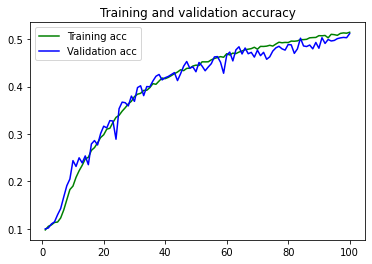

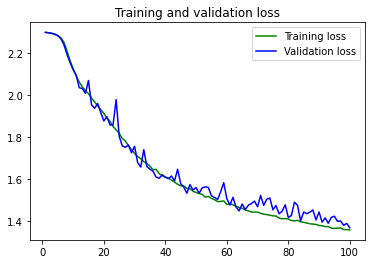

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

Model Accuracy on Test Dataset

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3547 - accuracy: 0.5153


[1.3546892404556274, 0.5152999758720398]

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

base_model_2 = ResNet50(include_top=False,weights=None,input_shape=(32,32,3),classes=y_train.shape[1])

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))
((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau

model_1= Sequential()
model_1.add(base_model_2) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet = model_1.fit(x_train,
                       y_train,
                     validation_data=(x_val, y_val),
                         epochs=100,
                         )

Epoch 1/100
1094/1094 [==============================] - 40s 36ms/step - loss: 1.9794 - accuracy: 0.2754 - val_loss: 1.7391 - val_accuracy: 0.3645
Epoch 2/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.6688 - accuracy: 0.3949 - val_loss: 1.5340 - val_accuracy: 0.4374
Epoch 3/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.5168 - accuracy: 0.4534 - val_loss: 1.4701 - val_accuracy: 0.4639
Epoch 4/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.4123 - accuracy: 0.4905 - val_loss: 1.3902 - val_accuracy: 0.5029
Epoch 5/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.3176 - accuracy: 0.5262 - val_loss: 1.3811 - val_accuracy: 0.5046
Epoch 6/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.2369 - accuracy: 0.5599 - val_loss: 1.3528 - val_accuracy: 0.5258
Epoch 7/100
1094/1094 [==============================] - 39s 36ms/step - loss: 1.1603 - accuracy: 0.5901 - val_loss: 1

In [ ]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 2.2151 - accuracy: 0.6435


[2.2151381969451904, 0.6434999704360962]

### Task 2.2 Fast training of ResNet


In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

**Option 1.**

In [ ]:
#Option 1
!git clone https://github.com/bckenstler/CLR.git
#adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Cloning into 'CLR'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 252 (delta 1), reused 4 (delta 0), pack-reused 244
Receiving objects: 100% (252/252), 2.06 MiB | 3.28 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
cd /content/CLR 


/content/CLR


In [ ]:
from keras.callbacks import *
from clr_callback import *
from keras.optimizers import Adam
import math

#Exponential Decay
def exp_decay(t):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * math.exp(-k*t)
   return lrate
lrate = LearningRateScheduler(exp_decay)


#Exponential Learning Rate
def scheduler(epoch, lr):
     if epoch < 10:
       return lr
     else:
       return lr * math.exp(-0.1)


#Cyclic Learning Rates
clr_triangular = CyclicLR(mode='triangular')


In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model_1.fit(x_train,
                       y_train,
                         epochs=100,
                      validation_data=(x_val, y_val),
                      callbacks=[clr_triangular,callback,lrate],
                    
                         )

Epoch 1/100
1094/1094 [==============================] - 41s 37ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 1.9500 - val_accuracy: 0.7017
Epoch 2/100
1094/1094 [==============================] - 40s 36ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 1.9066 - val_accuracy: 0.7099
Epoch 3/100
1094/1094 [==============================] - 40s 37ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 2.0522 - val_accuracy: 0.7116
Epoch 4/100
1094/1094 [==============================] - 40s 36ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 2.4336 - val_accuracy: 0.6790
Epoch 5/100
1094/1094 [==============================] - 40s 36ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 1.6417 - val_accuracy: 0.7030
Epoch 6/100
1094/1094 [==============================] - 40s 37ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 1.8113 - val_accuracy: 0.7085
Epoch 7/100
1094/1094 [==============================] - 40s 37ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 2

In [ ]:
cd ..

/content


**Option2**

In [ ]:
#Option 2 lookahed optimizer


In [ ]:
import tensorflow_addons as tfa
opt = tf.keras.optimizers.SGD(lr=0.001)
opt = tfa.optimizers.Lookahead(opt)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model_1.fit(x_train,
                       y_train,
                      validation_data=(x_val, y_val),
                         epochs=100)

Epoch 1/100
1094/1094 [==============================] - 58s 53ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 2.0667 - val_accuracy: 0.7083
Epoch 2/100
1094/1094 [==============================] - 57s 52ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 2.0717 - val_accuracy: 0.7079
Epoch 3/100
1094/1094 [==============================] - 57s 52ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 2.0673 - val_accuracy: 0.7083
Epoch 4/100
1094/1094 [==============================] - 57s 52ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 2.0752 - val_accuracy: 0.7091
Epoch 5/100
1094/1094 [==============================] - 58s 53ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 2.0575 - val_accuracy: 0.7081
Epoch 6/100
1094/1094 [==============================] - 58s 53ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 2.0658 - val_accuracy: 0.7083
Epoch 7/100
1094/1094 [==============================] - 58s 53ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 2

### Task 2.3 Performance comparison


Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.


| Task |Epochs |Test Accuracy
|-------|---------|----------|
|   1.1 (With DenseLayers)  | 100 | 0.72 
|   1.2( With CNN)  | 100 | 0.90
|   1.3(With Data Augmentation | 100 | 0.80  
|   1.4 Transfer learning(without fine tune)  | 100 | 0.992
|   1.4Transfer Learning(fine-tine)  | 100 | 0.099  



## Task 3 Design a novel deep neural network model 
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10


In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

**We** **are** **designing the convolution neural network on cifar 10 dataset. As we know that it takes times on simple DNN layers. We are moving towards pooling, padding and so on**. **This will improve the accuracy as** **well as training time.**
**Instead of using predefined models, we can use our custom to get the good results**


### Task 3.2: The implementation of the novel deep neural networks for CIFAR10



In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

In [5]:

(x_train,y_train),(x_test,y_test)=cifar10.load_data()


x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))
# compile it - categorical crossentropy is for multiple choice classification
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# train the model!
result=model.fit(x_train,
          y_train,
          epochs = 100,
          batch_size = 32,
          validation_data = (x_val,y_val))


Epoch 1/100
1094/1094 [==============================] - ETA: 0s - loss: 1.2602 - accuracy: 0.5719WARNING:tensorflow:Model was constructed with shape (None, 28, 28, 3) for input Tensor("conv2d_input:0", shape=(None, 28, 28, 3), dtype=float32), but it was called on an input with incompatible shape (None, 32, 32, 3).


1094/1094 [==============================] - 7s 6ms/step - loss: 1.2602 - accuracy: 0.5719 - val_loss: 1.1263 - val_accuracy: 0.6260
Epoch 2/100
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1012 - accuracy: 0.6285 - val_loss: 1.1822 - val_accuracy: 0.5987
Epoch 3/100
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9958 - accuracy: 0.6660 - val_loss: 1.1859 - val_accuracy: 0.6047
Epoch 4/100
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9183 - accuracy: 0.6952 - val_loss: 1.2247 - val_accuracy: 0.6357
Epoch 5/100
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8474 - accuracy: 0.7199 - val_loss: 1.0657 - val_accuracy: 0.6630
Epoch 6/100
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7878 - accuracy: 0.7373 - val_loss: 1.1417 - val_accuracy: 0.6517
Epoch 7/100
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7394 - accuracy: 0.7575 - val_loss: 1.3668 - val_accuracy: 0.66

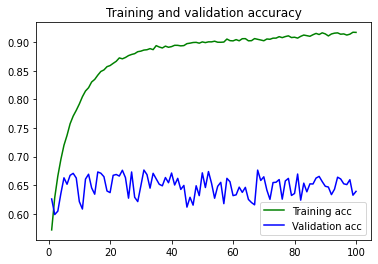

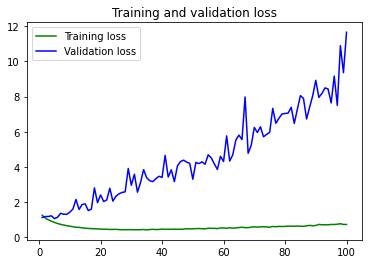

In [8]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

---
**END OF PART TWO**